# Wine quality prediction - Regression problem

We're going to build machine learning models for regression task using linear and tree algorithms. The goal of ML models are predict the quality of a wine given features from UCI Wine quality dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality).

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(4898, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nice!

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


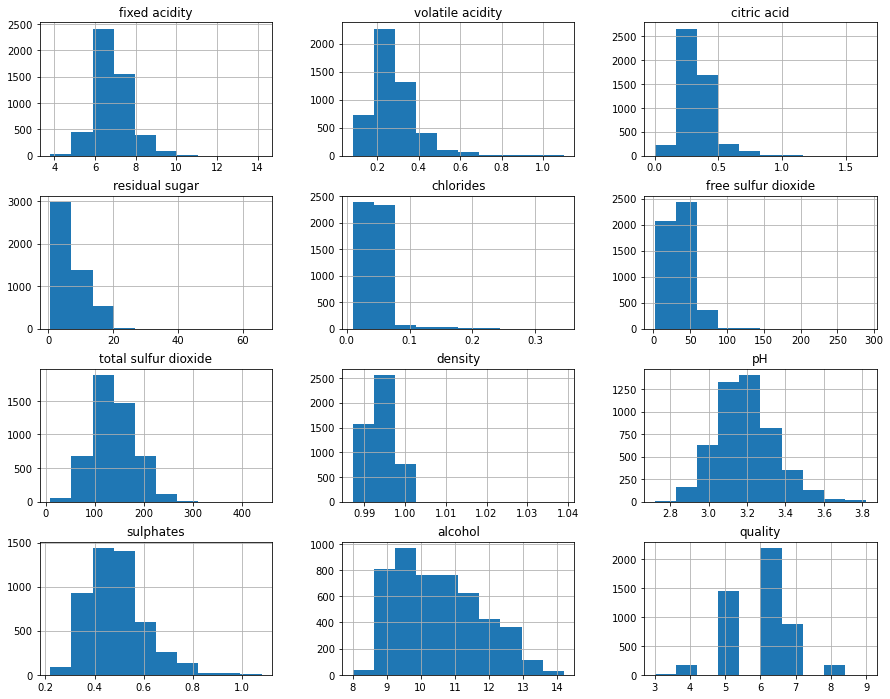

In [7]:
%matplotlib inline
df.hist(figsize=(15, 12));

In [8]:
# Split data in features (X) and target (y)
X = df.drop(['quality'], axis=1)
y = df['quality']

# SPilt X/y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ML models

### Linear regression

#### What are mean squared errors of model predictions on train and holdout sets?
Note: Holdout is "test set" for me because I don't use it for hyperparameter tuning, just for evaluate the final model (I hold out to use it before the final model is ready to "production/deployment").

In [10]:
# Build a linear regressor and fit it
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# Predict on train and test data using the model (lin_reg)
y_train_lin_reg = lin_reg.predict(X_train_scaled)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

print("MSE on train set:", mean_squared_error(y_train, y_train_lin_reg))
print("MSE on test set:", mean_squared_error(y_test, y_pred_lin_reg))

MSE on train set: 0.5580606489803572
MSE on test set: 0.5842473102404545


Not bad. Remember that MSE is an error, so the closer to zero, better it is.

#### Which feature this linear regression model treats as the most influential on wine quality?

In [12]:
lin_reg.coef_

array([ 9.78219223e-02, -1.92259947e-01, -1.83224449e-04,  5.38164096e-01,
        8.12724353e-03,  4.21804406e-02,  1.43040227e-02, -6.65720472e-01,
        1.50036006e-01,  6.20533605e-02,  1.29533447e-01])

In [13]:
coeff = pd.Series(data=lin_reg.coef_, index=X_train.columns)
coeff.sort_values(ascending=False)

residual sugar          0.538164
pH                      0.150036
alcohol                 0.129533
fixed acidity           0.097822
sulphates               0.062053
free sulfur dioxide     0.042180
total sulfur dioxide    0.014304
chlorides               0.008127
citric acid            -0.000183
volatile acidity       -0.192260
density                -0.665720
dtype: float64

A: density, because it influences most negatively

### LASSO

#### Which feature is the least informative in predicting wine quality, according to this LASSO model?

In [14]:
lasso = Lasso(alpha=0.01, random_state=17)
lasso.fit(X_train_scaled, y_train)

# Feature influences (like feature importances)
pd.Series(data=lasso.coef_, index=X_train.columns).sort_values(ascending=False)

alcohol                 0.322425
residual sugar          0.256363
pH                      0.067277
free sulfur dioxide     0.043088
sulphates               0.029722
fixed acidity          -0.000000
citric acid            -0.000000
total sulfur dioxide   -0.000000
chlorides              -0.002747
volatile acidity       -0.188479
density                -0.235492
dtype: float64

A: Whichever of fixed acidity, citric acid or total sulfur dioxide.

Now, let's try with cross-validation

#### Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?

In [15]:
alphas_lasso = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas_lasso, random_state=17, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv.alpha_

0.0002833096101839324

In [16]:
lasso_tuned = Lasso(alpha=lasso_cv.alpha_, random_state=17)
lasso_tuned.fit(X_train_scaled, y_train)

y_train_tuned_lasso = lasso_tuned.predict(X_train_scaled)
y_test_tuned_lasso = lasso_tuned.predict(X_test_scaled)

In [17]:
pd.Series(data=lasso_tuned.coef_, index=X_train.columns).sort_values(ascending=False)

residual sugar          0.526883
pH                      0.146549
alcohol                 0.137115
fixed acidity           0.093295
sulphates               0.060939
free sulfur dioxide     0.042698
total sulfur dioxide    0.012969
chlorides               0.006933
citric acid            -0.000000
volatile acidity       -0.192049
density                -0.648161
dtype: float64

A: citric acid  

It seems that citric acid is the least informative feature.

#### What are mean squared errors of tuned LASSO predictions on train and holdout sets?

In [18]:
print(f"Tuned lasso MSE on train set: {mean_squared_error(y_train, y_train_tuned_lasso)}")
print(f"Tuned lasso MSE on test set: {mean_squared_error(y_test, y_test_tuned_lasso)}")

Tuned lasso MSE on train set: 0.558070014187378
Tuned lasso MSE on test set: 0.5832976077860635


### Random Forest

#### What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?

In [19]:
base_forest = RandomForestRegressor(random_state=17)
base_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [20]:
y_train_base_forest = base_forest.predict(X_train)
cross_val_base_f = cross_val_score(base_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
y_pred_base_forest = base_forest.predict(X_test)

print("MSE of RF on train set:", mean_squared_error(y_train, y_train_base_forest))
print("MSE of RF in cv:", -cross_val_base_f.mean())
print("MSE of RF on test set:", mean_squared_error(y_test, y_pred_base_forest))

MSE of RF on train set: 0.052711260210035006
MSE of RF in cv: 0.41433128807644015
MSE of RF on test set: 0.37076367346938777


#### What are mean squared errors of tuned RF model in cross-validation and on holdout set? 

In [21]:
forest_params = {'max_depth': list(range(10, 25)),
                 'max_features': list(range(6,12))}

grid_forest = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=17),
                           forest_params,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_mean_squared_error')

grid_forest.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
y_pred_grid = grid_forest.predict(X_test)

print("MSE of Tuned RF in cv:", -grid_forest.best_score_)
print("MSE of Tuned RF on test set:", mean_squared_error(y_test, y_pred_grid))

MSE of Tuned RF in cv: 0.417434713090657
MSE of Tuned RF on test set: 0.3700500402242752


#### What is the most important feature, according to the Random Forest model?

In [28]:
grid_forest.estimator.feature_importances_ # incorrect, I need to train a RF with best params

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
grid_forest.best_params_

{'max_depth': 20, 'max_features': 7}

In [33]:
grid_forest.

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11]},
             scoring='neg_mean_squared_error', verbose=2)>

In [36]:
# best_rf = RandomForestRegressor(grid_forest.best_params_, random_state=14, n_jobs=-1) # Nop
best_rf = RandomForestRegressor(random_state=14, n_jobs=-1, **grid_forest.best_params_) # Yes, remember **kwargs
best_rf.fit(X_train, y_train)

pd.Series(best_rf.feature_importances_, X_train.columns).sort_values(ascending=False)

alcohol                 0.199697
volatile acidity        0.120062
free sulfur dioxide     0.113186
density                 0.100152
pH                      0.072999
total sulfur dioxide    0.071532
residual sugar          0.070403
chlorides               0.069939
fixed acidity           0.063409
citric acid             0.060230
sulphates               0.058391
dtype: float64